## Justification Check

1. dimension of hilbert space
    - by varying the dimension to check whether the Rabi oscillation

2. varying the interaction strength
3. dt and T



# Part 1 Beam Splitter Hamiltonian

In [2]:
import time

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy, identity, 
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay, mcsolve,
                   sigmaz, tensor, thermal_dm, Bloch, about, plot_expectation_values, fsesolve, thermal_dm)

%matplotlib inline

In [3]:
Hilbert_dim_phi = 2 ** 5
Hilbert_initial_phi = 1

Hilbert_dim_x = 2 ** 5
Hilbert_initial_x = 10

#psi0 = tensor(thermal_dm(Hilbert_dim_phi, Hilbert_initial_phi), thermal_dm(Hilbert_dim_x, Hilbert_initial_x))
psi0 =  tensor(fock(Hilbert_dim_phi, Hilbert_initial_phi), fock(Hilbert_dim_x, Hilbert_initial_x))
anni_phi = tensor(destroy(Hilbert_dim_phi), qeye(Hilbert_dim_x))
anni_x = tensor(qeye(Hilbert_dim_phi), destroy(Hilbert_dim_x))
# qeye = identity


In [4]:
# expectation operators
e_ops = [anni_x.dag() * anni_x, anni_phi.dag() * anni_phi]
c_ops = []

(<Figure size 800x400 with 2 Axes>,
 array([[<AxesSubplot: ylabel='<n_x>'>],
        [<AxesSubplot: xlabel='time', ylabel='<n_phi>'>]], dtype=object))

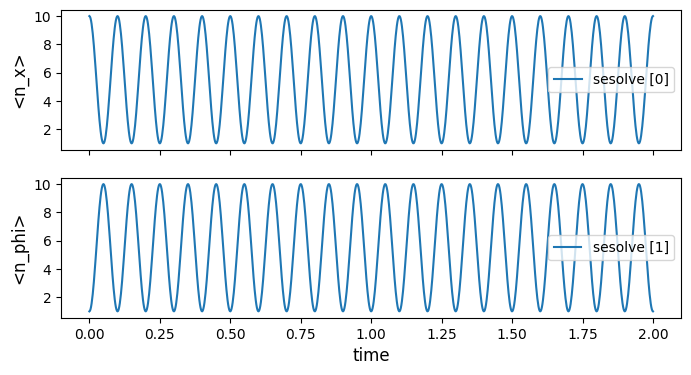

In [5]:
w_phi = 1000.0 * 2 * np.pi
w_x = 100.0 * 2 * np.pi
g_weak = 5 * 2 * np.pi # Rabi frequency
g_strong = 7.5 * 2 * np.pi
# Case 1: Time independent Interaction Hamiltonian

#H_weak = w_phi * anni_phi.dag() * anni_phi + w_x * anni_x.dag() * anni_x +  g_weak * (anni_phi.dag() * anni_x + anni_phi * anni_x.dag())
H_weak =  g_weak * (anni_phi.dag() * anni_x + anni_phi * anni_x.dag())
times = np.linspace(0, 10 * 2 * np.pi / g_weak, 1000) # 10 times the Rabi oscillation, 1000 steps

result_me_weak = mesolve(H_weak, psi0, times, c_ops, e_ops)
#result_brme_weak = brmesolve(H_weak, psi0, times, a_ops, e_ops)
plot_expectation_values(
    [result_me_weak],
    ylabels=["<n_x>", "<n_phi>"],
    show_legend=True,
)

In [6]:
peaks_posi, _ = find_peaks(result_me_weak.expect[0])
print('Period for Rabi oscillation is {:.3f}s'.format(times[peaks_posi[1]] - times[peaks_posi[0]]))
print(times[peaks_posi[1]], times[peaks_posi[0]])
print('Period by g is {:.3f}'.format( 2 * np.pi / np.sqrt(4 * g_weak ** 2)))

Period for Rabi oscillation is 0.100s
0.20020020020020018 0.10010010010010009
Period by g is 0.100


# Part 2 Beam Splitter Hamiltonian + Time Dependence
### Adding a time dependence

(<Figure size 800x400 with 2 Axes>,
 array([[<AxesSubplot: ylabel='<n_cav>'>],
        [<AxesSubplot: xlabel='time', ylabel='<n_atom>'>]], dtype=object))

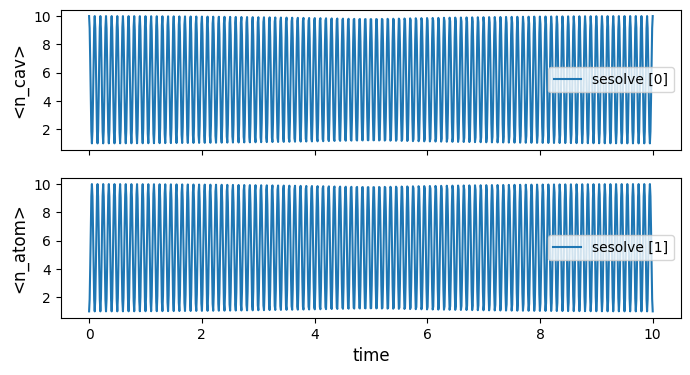

In [7]:
w_phi = 10.0 * 2 * np.pi
w_x = 10.0 * 2 * np.pi
g_weak = 1 * 2 * np.pi # Rabi frequency
g_strong = 0.75 * 2 * np.pi
Omega = 1 * 2 * np.pi

# Case 1: Time independent Interaction Hamiltonian

H_weak_time_dep = w_phi * anni_phi.dag() * anni_phi + w_x * anni_x.dag() * anni_x +  g_weak * (anni_phi.dag() * anni_x + anni_phi * anni_x.dag())
times = np.linspace(0, 10 * 2 * np.pi / g_weak, 1000) # 10 times the Rabi oscillation, 1000 steps

result_me_weak = mesolve(H_weak, psi0, times, c_ops, e_ops)
#result_brme_weak = brmesolve(H_weak, psi0, times, a_ops, e_ops)
plot_expectation_values(
    [result_me_weak],
    ylabels=["<n_cav>", "<n_atom>"],
    show_legend=True,
)

In [8]:
Hilbert_dim_phi = 2 ** 6
Hilbert_initial_phi = 1

Hilbert_dim_x = 2 ** 6
Hilbert_initial_x = 3

psi0 = tensor(fock(Hilbert_dim_phi,Hilbert_initial_phi), fock(Hilbert_dim_x, Hilbert_initial_x))
anni_phi = tensor(destroy(Hilbert_dim_phi), qeye(Hilbert_dim_x))
anni_x = tensor(qeye(Hilbert_dim_phi), destroy(Hilbert_dim_x))
# qeye = identity


In [9]:
w_phi = 10.0 * 2 * np.pi
w_x = 10.0 * 2 * np.pi
g_weak = 1 * 2 * np.pi # Rabi frequency
g_strong = 0.75 * 2 * np.pi
Omega = 1 * 2 * np.pi


g = 1j * g_weak

In [10]:
# expectation operators
e_ops = [anni_x.dag() * anni_x, anni_phi.dag() * anni_phi]
c_ops = []

In [11]:
def Hamiltonian_t(t, args):
    H_x = args['H_x']
    H_phi = args['H_phi']
    H_int = args['H_int']
    w_phi = args['w_phi']
    w_x = args['w_x']
    g = args['g']
    Omega = args['Omega']
    
    return w_phi * H_phi + w_x * H_x +  g * (H_int * np.exp(1j * Omega * t) + H_int.dag() * np.exp(-1j * Omega * t))

(<Figure size 800x400 with 2 Axes>,
 array([[<AxesSubplot: ylabel='<n_cav>'>],
        [<AxesSubplot: xlabel='time', ylabel='<n_atom>'>]], dtype=object))

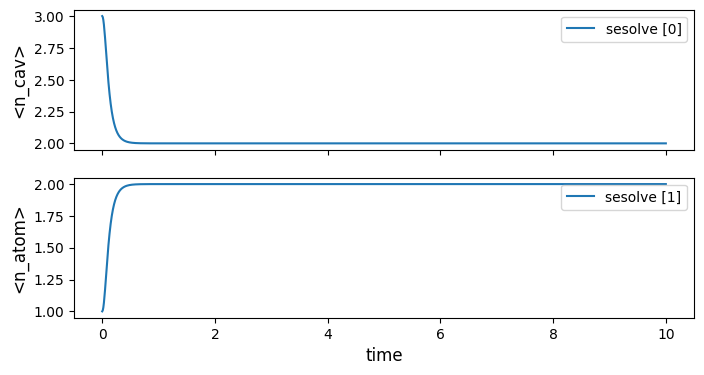

In [12]:
H_phi = anni_phi.dag() * anni_phi
H_x = anni_x.dag() * anni_x
H_int = anni_phi.dag() * anni_x

H_args = {'H_x': H_x, 'H_phi': H_phi, 'H_int': H_int, 'w_phi': w_phi, 'w_x': w_x, 'g': g, 'Omega' : Omega}

output = mesolve(Hamiltonian_t, psi0, times, c_ops, e_ops, H_args)

plot_expectation_values(
    [output],
    ylabels=["<n_cav>", "<n_atom>"],
    show_legend=True,
)

In [13]:
peaks_posi, _ = find_peaks(output.expect[0])
print('Period for Rabi oscillation is {:.3f}s'.format(2 * times[peaks_posi[1]] - 2 * times[peaks_posi[0]]))
print('Period by Theory is {:.3f}'.format( 2 * np.pi / np.sqrt(g ** 2  + (Omega - w_x + w_phi) ** 2)))

Period for Rabi oscillation is 0.060s
Period by Theory is inf+nanj


C:\Users\electron\AppData\Local\Temp\ipykernel_7112\314838786.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  print('Period by Theory is {:.3f}'.format( 2 * np.pi / np.sqrt(g ** 2  + (Omega - w_x + w_phi) ** 2)))
C:\Users\electron\AppData\Local\Temp\ipykernel_7112\314838786.py:3: RuntimeWarning: invalid value encountered in scalar divide
  print('Period by Theory is {:.3f}'.format( 2 * np.pi / np.sqrt(g ** 2  + (Omega - w_x + w_phi) ** 2)))


Some sources for mathieu equation general solutions

- NIST Chapter 28 Mathieu Functions and Hill’s Equation  G. Wolf https://dlmf.nist.gov/28
- Mathieu Function characteris numbers a(q) / b(q): https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.mathieu_a.html
- Floquet theorm: https://en.wikipedia.org/wiki/Mathieu_function

Summary: Hard to get the mu(Floquet exponent) so do the coefficients (see https://dlmf.nist.gov/28.2 28.2(iv) Floquet solutions)

Decision: using the numerical methods to get the coefficients

general form of the mathieu equation takes the form:

$$u(t) = Ae^{i\nu t}\sum_{n=-\infty}^\infty C_{2n} e^{i n\Omega_{RF}t} + Be^{-i\nu t}\sum_{n=-\infty}^\infty C_{2n} e^{-i n\Omega_{RF}t} $$

In [14]:
import numpy as np
# general form of the mathieu equation takes the form as above

def General_Mathieu_Function(t, args):
    '''
    Params
    --------
    t: float time
    args: dictionary
        A: float to determine the linear combination of the general solution, A in [0, 1]
        n: integer
        C_array : narray takes the shape of (n), the first C0, C2, ..., C2n
        nu: float radial frequency
        Omega_RF: float RF freqency
    '''

    A = args['A']
    n = args['n']
    C_0 = args['C_0']
    C_array_posi = args['C_array_posi']
    C_array_nega = args['C_array_nega']
    wradial = args['wradial']
    wrf = args['wrf']

    A_num = C_0
    B_num = C_0
    
    for i in np.arange(n):
        A_num += C_array_posi[i] * np.exp(1j * i * wrf * t)
        A_num += C_array_nega[i] * np.exp(-1j * i * wrf * t)
        B_num += C_array_posi[i] * np.exp(-1j * i * wrf * t)
        B_num += C_array_posi[i] * np.exp(1j * i * wrf * t)

    return A * np.exp(1j * wradial * t) * A_num + (1 - A) * np.exp(-1j * wradial * t) * B_num




In [15]:
QualityFactor = 2000
wradial = 2 * np.pi * 2.16e9
wrf = 2 * np.pi * 10.6e9
fres = wradial / 2 / np.pi
kappa = 2 * np.pi * fres / QualityFactor

# expectation operators
e_ops = [anni_x.dag() * anni_x, anni_phi.dag() * anni_phi]
#c_ops = [kappa * anni_phi]
c_ops = []

In [16]:
def Hamiltonian_t(t, args):
    g = args['g']
    anni_phi = args['anni_phi']
    anni_x = args['anni_x']
    fres = args['fres']
    Omega = 2 * np.pi * fres
    u_t = General_Mathieu_Function(t, args)

    return g * (anni_phi * np.exp(-1j * Omega * t) - anni_phi.dag() * np.exp(1j * Omega * t)) * (anni_x * np.conj(u_t) + anni_x.dag() * u_t)

(<Figure size 800x400 with 2 Axes>,
 array([[<AxesSubplot: ylabel='<n_x>'>],
        [<AxesSubplot: xlabel='time', ylabel='<n_phi>'>]], dtype=object))

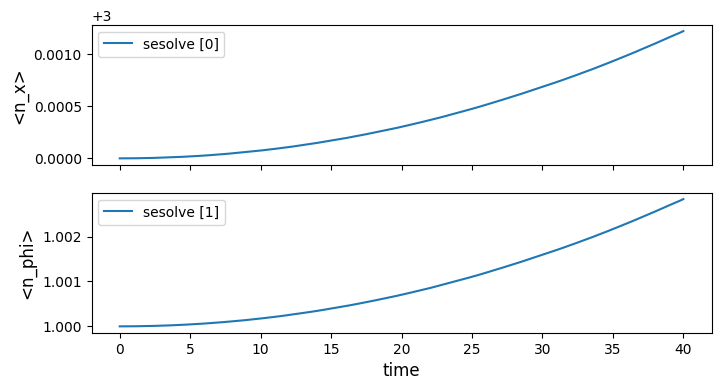

In [28]:
n = 4
A = 0.5
C_0 = 0.6
#g = -1.341312180695114e-30j
g = -10e-4j
g = 10e-4
C_array_posi = [0.2, 0.15, 0.025, 0.020]
C_array_nega = C_array_posi
wradial = 2 * np.pi * 2.16e9
wrf = 2 * np.pi * 10.6e9
fres = wradial / 2 / np.pi

times = np.linspace(0, 40 * 2 * np.pi /abs(g_weak), 10000) # 10 times the Rabi oscillation, 1000 steps

H_args = {
    'A': A,
    'n': n,
    'C_0': C_0,
    'C_array_posi': C_array_posi, 
    'C_array_nega': C_array_nega,
    'wradial': wradial,
    'wrf': wrf,
    'g': g,
    'anni_phi': anni_phi,
    'anni_x': anni_x,
    'fres': fres
}

output = mesolve(Hamiltonian_t, psi0, times, c_ops, e_ops, H_args)

plot_expectation_values(
    [output],
    ylabels=["<n_x>", "<n_phi>"],
    show_legend=True,
)

In [18]:
q = 1.6e-19
m = 9.10938297e-31
C = 1e-12
Rp = 80e3
deff = 200e-6
hbar = 1.054571817e-34
Q0 = -1j * np.sqrt( hbar / 2 / Rp) 
x0 = np.sqrt(hbar / (2 * m * wradial))

print(q / C / deff * Q0 * x0)

-1.341312180695114e-30j
